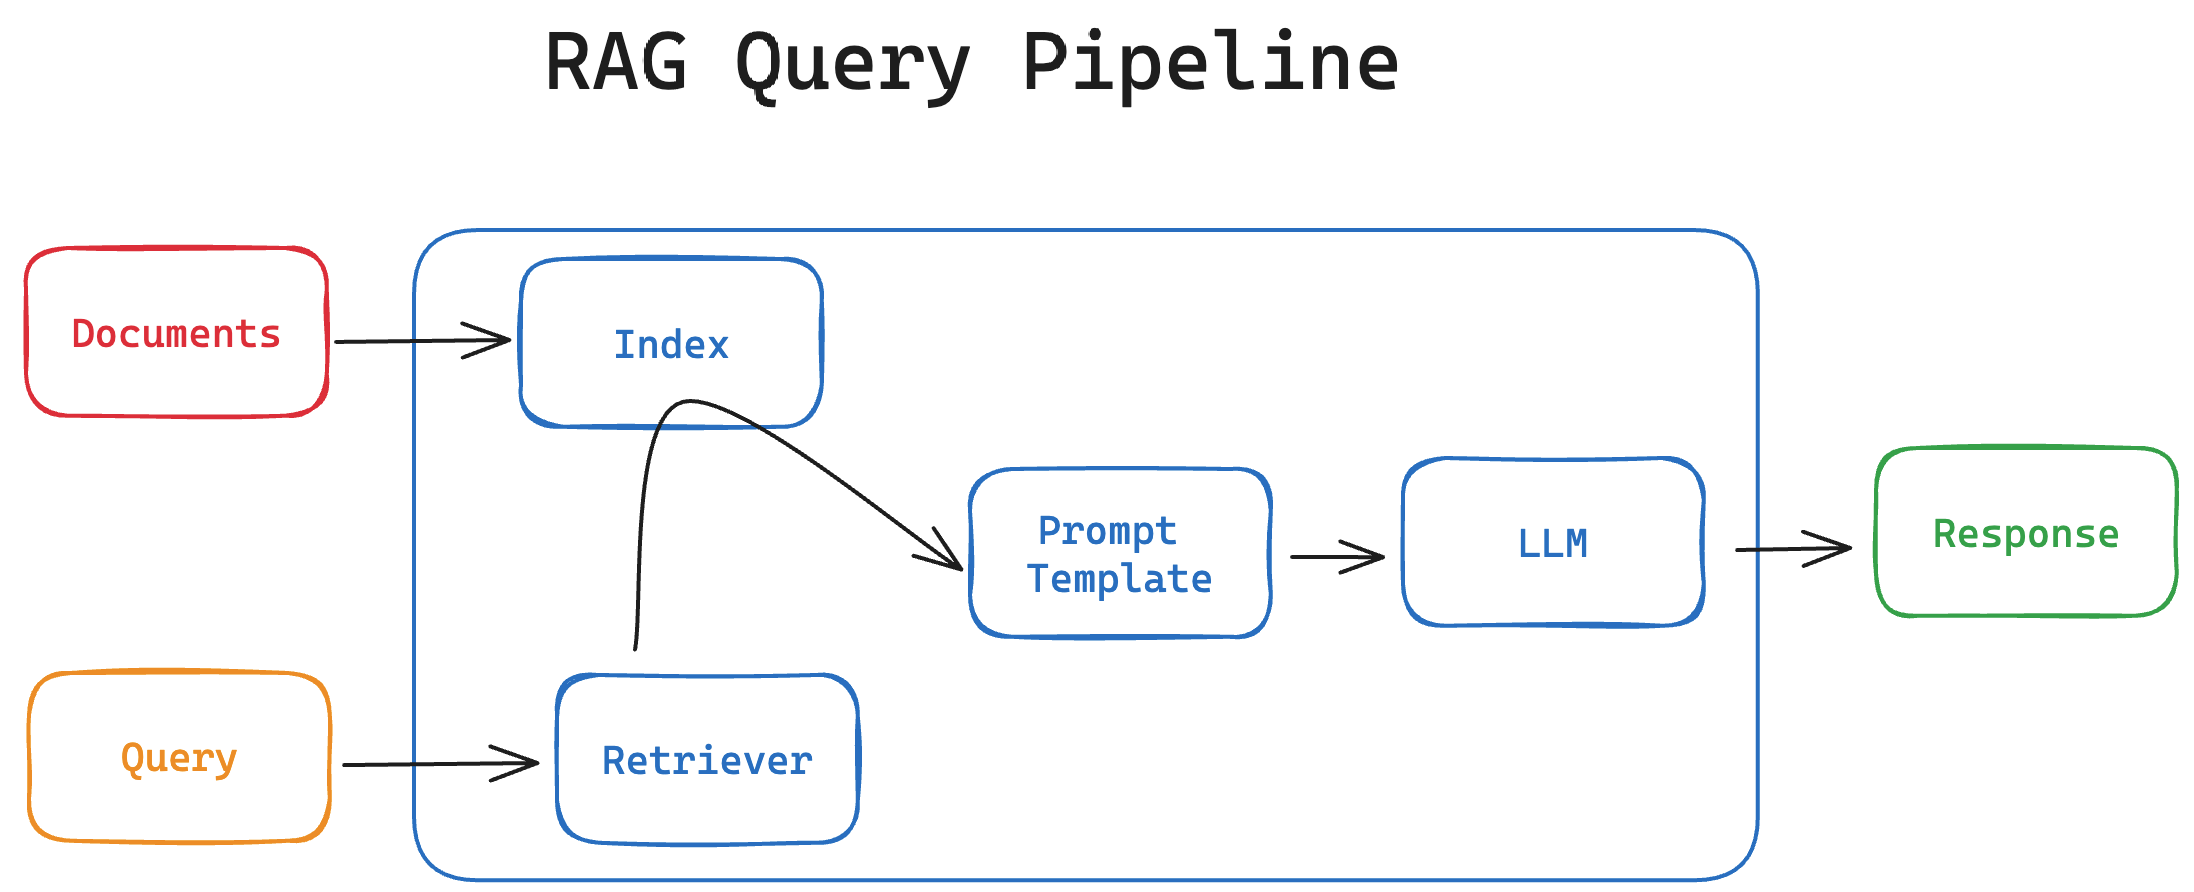

# RAG with LlamaIndex and Jina Embeddings

This walkthrough shows how to use Jina Embeddings in a RAG setting using LlamaIndex and DocArray vector store. We first load the data and set up the index.


In [4]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Settings, StorageContext
from llama_index.core.embeddings import resolve_embed_model
from llama_index.core.prompts import PromptTemplate
from llama_index.llms.ollama import Ollama
from llama_index.vector_stores.docarray import DocArrayInMemoryVectorStore
from llama_index.embeddings.huggingface import HuggingFaceEmbedding


# load the data
documents = SimpleDirectoryReader("data").load_data()

# embedding model
model = HuggingFaceEmbedding(model_name="jinaai/jina-embeddings-v2-base-de", trust_remote_code=True)
Settings.embed_model = model

# ollama (you can use whichever model you want)
Settings.llm = Ollama(model="mistral", request_timeout=500.0)

# indexing
vector_store = DocArrayInMemoryVectorStore() 
storage_context = StorageContext.from_defaults(vector_store=vector_store)
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context # documents reveive embeddings
)

## Time for querying!

In [5]:
query_engine = index.as_query_engine(response_mode="compact")

In [6]:
response = query_engine.query("How did I dress for halloween?")
print(response)

 In the first diary entry, you dressed up as the captain of a ghost ship for Halloween. Your costume consisted of an old saltwater-soaked cloak adorned with shells and seaweed, resembling relics from a sunken world. You also wore a mask representing the face of a long-forgotten sailor, with glowing eyes in the light of the dead. A rusty sword was at your side as a witness to countless battles against deep-sea monsters.


In [7]:
response = query_engine.query("Warum war meine Katze krank?")
print(response)

 The text does not provide specific details about what caused the cat to be sick. It only mentions that the cat was diagnosed with an infection by a veterinarian.


In [8]:
response = query_engine.query("How did I spend my 25th birthday")
print(response)

 Your 25th birthday was marked by love, surprises, and moments of pure happiness. The day began with a surprise as you were greeted by a sea of balloons and a group of your closest friends who sang "Happy Birthday" to you. The breakfast was a feast prepared by your friends, filled with laughter, storytelling, and enjoying each other's company.

The highlight of the day was a secret surprise: a hot air balloon ride. This dream of yours since childhood became a reality on this day. The serene and breathtaking view of the world from above was an unforgettable experience. In that moment, drifting between heaven and earth, you felt a deep connection to the universe and a sense of gratitude for the life you lead.

The day ended with a small, intimate party with family and friends. It was the perfect blend of laughter, dancing, and moments of reflection. The love and warmth you felt on this day were overwhelming. You received gifts that held more than material value, each carefully chosen and

## What do we gain from this?

 - retrieve answers/similar documents regardless of language (bilingual embeddings!)
 - don't need to update any LLM model weights (privacy + efficiency, domain specific knowledge)
 - can in theory search through tons of (long!) documents